In [1]:
import sys

sys.path.append('../')

import keras4torch as k4t
import torch
from torch import nn
from sklearn.datasets import load_iris
import numpy as np
from keras4torch.metrics import *

In [2]:
X, y = load_iris(return_X_y=True)
X = X.astype(np.float32)
y = y.astype(np.int64)

In [3]:
model = nn.Sequential(
    nn.Linear(4, 128), nn.ReLU(),
    nn.Sequential(
        nn.Linear(128, 64), nn.ReLU()
    ),
    nn.Linear(64, 3)
)

model = k4t.Model(model)

In [4]:
model.compile(optimizer=torch.optim.Adam(model.parameters(), lr=3e-4),
                loss=nn.CrossEntropyLoss(),
                metrics={'acc': Accuracy()},
                )

In [5]:
model.summary(input_shape=[4])

Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 128]                 640
├─ReLU: 1-2                              [-1, 128]                 --
├─Sequential: 1-3                        [-1, 64]                  --
|    └─Linear: 2-1                       [-1, 64]                  8,256
|    └─ReLU: 2-2                         [-1, 64]                  --
├─Linear: 1-4                            [-1, 3]                   195
Total params: 9,091
Trainable params: 9,091
Non-trainable params: 0
Total mult-adds (M): 0.02
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.03
Estimated Total Size (MB): 0.04


In [6]:
history = model.fit(X, y,
            epochs=15,
            validation_split=0.2,
            )

Train on 120 samples, validate on 30 samples:
Epoch 1/15 - 0.0s - loss: 1.1248 - acc: 0.3568 - val_loss: 1.1553 - val_acc: 0.2667 - lr: 3e-04
Epoch 2/15 - 0.0s - loss: 1.0815 - acc: 0.3542 - val_loss: 1.0905 - val_acc: 0.2667 - lr: 3e-04
Epoch 3/15 - 0.0s - loss: 1.0506 - acc: 0.3464 - val_loss: 1.0438 - val_acc: 0.2667 - lr: 3e-04
Epoch 4/15 - 0.0s - loss: 1.0253 - acc: 0.3568 - val_loss: 1.0106 - val_acc: 0.2667 - lr: 3e-04
Epoch 5/15 - 0.0s - loss: 1.0114 - acc: 0.2995 - val_loss: 0.9818 - val_acc: 0.4333 - lr: 3e-04
Epoch 6/15 - 0.0s - loss: 0.9890 - acc: 0.4375 - val_loss: 0.9626 - val_acc: 0.6000 - lr: 3e-04
Epoch 7/15 - 0.0s - loss: 0.9741 - acc: 0.5938 - val_loss: 0.9443 - val_acc: 0.6667 - lr: 3e-04
Epoch 8/15 - 0.0s - loss: 0.9570 - acc: 0.6432 - val_loss: 0.9283 - val_acc: 0.7000 - lr: 3e-04
Epoch 9/15 - 0.0s - loss: 0.9397 - acc: 0.6484 - val_loss: 0.9124 - val_acc: 0.7333 - lr: 3e-04
Epoch 10/15 - 0.0s - loss: 0.9210 - acc: 0.6510 - val_loss: 0.8969 - val_acc: 0.7333 - lr:

<AxesSubplot:>

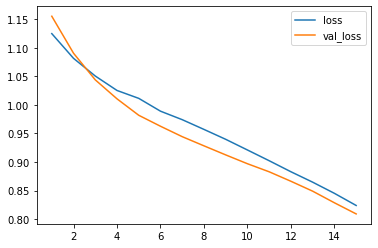

In [7]:
history.plot(kind='line', y=['loss', 'val_loss'])

In [8]:
model.evaluate(X, y)

OrderedDict([('loss', 0.81155217), ('acc', 0.9505682)])

In [9]:
model.predict(X)

array([[ 0.5312903 , -0.19827157, -0.18038115],
       [ 0.42034125, -0.13267046, -0.141011  ],
       [ 0.47793502, -0.17174369, -0.16838089],
       [ 0.4104807 , -0.15519157, -0.157296  ],
       [ 0.542342  , -0.2139661 , -0.19081193],
       [ 0.49892765, -0.21785235, -0.17992714],
       [ 0.45725918, -0.18956682, -0.17547163],
       [ 0.48490882, -0.18503127, -0.17236999],
       [ 0.38585642, -0.13646239, -0.14755562],
       [ 0.446979  , -0.1533322 , -0.15618432],
       [ 0.5609041 , -0.21399629, -0.18704021],
       [ 0.45388559, -0.18832871, -0.17633379],
       [ 0.442358  , -0.14509585, -0.1529508 ],
       [ 0.48049957, -0.16614771, -0.17566487],
       [ 0.67533594, -0.24785322, -0.21062824],
       [ 0.63564664, -0.27717593, -0.21408856],
       [ 0.5777615 , -0.22786292, -0.1868268 ],
       [ 0.5042926 , -0.19010922, -0.1707373 ],
       [ 0.51995206, -0.20350143, -0.17295754],
       [ 0.5323499 , -0.22733751, -0.19164854],
       [ 0.45806485, -0.16443405, -0.154